## Final Project Submission


* Student name: Muhsin Ahmed Abdule
* Student pace: part-time
* Scheduled project review date/time: 05/11/2023
* Instructor name: Everlyn Asiko
* Blog post URL: https://github.com/muhsin48/dsc-phase-1-project.git


## Overview
In this project , I aim to provide actionable insights to Microsoft which is venturing into the film industry through establishing a new studio.Microsoft is a giant in the technology sector however they lack experience when it come to the film industry.The projects's Objectives is to explore the movie industry and identify which film types are doing the best at the box office

### Business Problem

The main business problem is that Microsoft wants to venture into a competitive Market without the prior experience of the industry.To address the problem,this project explores and answers several questions to provide actionable insights:

Which genre selection are currently the most successful?
Is there a Relationship between Profits and movie budgets?
Is there a Relationship between Rating,number of votes and profits made?
What is the trend of profits across years?


### Data understanding
The data used for this project comes from  the following websites:

1.IMDB: i used the IMDB to access two datasets i.e imdb.title.basics that contains fundamental information about movies,imdb.title.ratings that contains rating information about movies

2.Box Office Mojo (BOM):I used the bom.movie_gross that contains earnign values for movies at the box office

3.The Numbers (TN): tn.movie_budgets this dataset contains information on the production budget

These datasets are relevant to our data analysis questions.They allow us to explore and the film industry in relation to its financial success and other aspects.The data provides insights that can guide Microsoft's studio to create new films and  navigate through the film industry and make huge profits

The data represents movies with each row corresponding to a unique film.The sample include wide range of movies from different Genres,Start_year and production Budgets

The Target variable for this analysis is on  the Profit Made which can be calculated through analysis of the box office and the production Budgets

properties of the key variables include:

The imdb.title.basics dataset includes variables like movie titles, genres, and Start years.
The imdb.title.ratings dataset provides information about movie average_rating and the number of votes
The bom.movie_gross dataset contains variables for movie titles, studio names, and domestic and foreign gross earnings
The tn.movie_budgets dataset has variables such as movie titles, production budgets, and domestic and worldwide gross earnings.

In [1]:
# import necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the data files

file_path_1= "C:/Users/ENVY x360/Desktop/title.ratings.csv"
file_path_2= "C:/Users/ENVY x360/Desktop/bom.movie_gross.csv"
file_path_3= "C:/Users/ENVY x360/Desktop/title.basics.csv"
file_path_4= "C:/Users/ENVY x360/Desktop/tn.movie_budgets.csv"

### Loading the data

In [3]:
basics_df= pd.read_csv(file_path_3)
ratings_df= pd.read_csv(file_path_1)
gross_df=pd.read_csv(file_path_2)
budget_df= pd.read_csv(file_path_4)


In [4]:
basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:

ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:

gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:

budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Data cleaning and preparation

The datasets contains missing values and the datatypes are not correctly matched therefore we'll do some data normalization and cleanig

In [12]:
# dropping all the empty rows
basics_df.dropna(how="all",inplace=True)
ratings_df.dropna(how="all",inplace=True)
gross_df.dropna(how="all",inplace=True)
budget_df.dropna(how="all",inplace=True)

In [13]:
basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Here am ensuring the movie title are normalized and entered the same way since i will be using it to merge with other dataframes

In [14]:
basics_df["primary_title"]=basics_df["primary_title"].str.lower()
basics_df["primary_title"]=basics_df["primary_title"].str.replace("[^a-zA-Z0-9\s]","",regex="True").str.strip()

In [15]:
basics_df["original_title"]=basics_df["original_title"].str.lower()
basics_df["original_title"]=basics_df["original_title"].str.replace("[^a-zA-Z0-9\s]","",regex="True").str.strip()

In [16]:
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


In [17]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
budget_df["movie"]=budget_df["movie"].str.lower()
budget_df["movie"]=budget_df["movie"].str.replace("[^a-zA-Z0-9\s]","",regex="True").str.strip()

In [19]:
# renaming the column for easier reading

budget_df.rename(columns=({"movie":"movie_title"}),inplace=True)

extracting the year from the release date which i will use to merge the dataframes

In [20]:
budget_df["release_year"] = budget_df["release_date"].apply(lambda x: x.split(",")[-1].strip() if isinstance(x, str) else None)


In [21]:
# confirm the changes made 
budget_df["release_year"]

0       2009
1       2011
2       2019
3       2015
4       2017
        ... 
5777    2018
5778    1999
5779    2005
5780    2015
5781    2005
Name: release_year, Length: 5782, dtype: object

normalizing the columns by removing special characters and converting to float type

In [22]:
# removing the special character before conversion
budget_df["production_budget"]=budget_df["production_budget"].apply(lambda x: x.replace("$",""))
budget_df["domestic_gross"]=budget_df["domestic_gross"].apply(lambda x: x.replace("$",""))

budget_df["worldwide_gross"]=budget_df["worldwide_gross"].apply(lambda x: x.replace("$",""))


In [23]:
budget_df["production_budget"] = budget_df["production_budget"].str.replace(',', '', regex=True).astype(float)

budget_df["domestic_gross"] = budget_df["domestic_gross"].str.replace(',', '', regex=True).astype(float)
budget_df["worldwide_gross"] = budget_df["worldwide_gross"].str.replace(',', '', regex=True).astype(float)



In [24]:
# converting the year to int 
budget_df["release_year"]=budget_df["release_year"].astype(int)

In [25]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie_title        5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   release_year       5782 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 338.8+ KB


normalizing the title column to avoid duplications

In [26]:
# removing special characters and lower casing the title
gross_df["title"]=gross_df["title"].str.lower().str.replace("[^a-zA-Z0-9\s]","").str.strip()

In [27]:
gross_df["foreign_gross"]=gross_df["foreign_gross"].str.replace(",","").astype(float)

#### Merging the dataset
Merging the four datasets for further exploration and analysis of the data

In [28]:
basics_gross_df=pd.merge(basics_df,gross_df,left_on=["primary_title","start_year"],right_on=["title","year"],how="inner")

In [29]:
basics_gross_ratings=pd.merge(basics_gross_df,ratings_df,on="tconst",how="inner")

In [30]:
all_data=pd.merge(basics_gross_ratings,budget_df,left_on=["primary_title","start_year"],right_on=["movie_title","release_year"],how="inner")

In [31]:
all_data.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross_x,foreign_gross,year,averagerating,numvotes,id,release_date,movie_title,production_budget,domestic_gross_y,worldwide_gross,release_year
0,tt0359950,the secret life of walter mitty,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",the secret life of walter mitty,Fox,58200000.0,129900000.0,2013,7.3,275300,37,"Dec 25, 2013",the secret life of walter mitty,91000000.0,58236838.0,1.878612e+08,2013
1,tt0365907,a walk among the tombstones,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",a walk among the tombstones,Uni.,26300000.0,26900000.0,2014,6.5,105116,67,"Sep 19, 2014",a walk among the tombstones,28000000.0,26017685.0,6.210859e+07,2014
2,tt0369610,jurassic world,jurassic world,2015,124.0,"Action,Adventure,Sci-Fi",jurassic world,Uni.,652300000.0,1019.4,2015,7.0,539338,34,"Jun 12, 2015",jurassic world,215000000.0,652270625.0,1.648855e+09,2015
3,tt0376136,the rum diary,the rum diary,2011,119.0,"Comedy,Drama",the rum diary,FD,13100000.0,10800000.0,2011,6.2,94787,16,"Oct 28, 2011",the rum diary,45000000.0,13109815.0,2.154473e+07,2011
4,tt0383010,the three stooges,the three stooges,2012,92.0,"Comedy,Family",the three stooges,Fox,44300000.0,10500000.0,2012,5.1,28570,4,"Apr 13, 2012",the three stooges,30000000.0,44338224.0,5.405225e+07,2012


In [32]:
# checking for null values
all_data.isna().sum()

tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes        3
genres                 1
title                  0
studio                 0
domestic_gross_x       1
foreign_gross        113
year                   0
averagerating          0
numvotes               0
id                     0
release_date           0
movie_title            0
production_budget      0
domestic_gross_y       0
worldwide_gross        0
release_year           0
dtype: int64

In [33]:
# checking for duplicates
all_data.duplicated().sum()

0

we have many columns after merging the datasets so i am removing any unneccessary columns for easier readability 

In [34]:
# removing columns
all_data.drop(columns=["original_title","title","domestic_gross_x","foreign_gross","year","id","movie_title","release_year"],inplace=True)

In [35]:
all_data.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'studio', 'averagerating', 'numvotes', 'release_date',
       'production_budget', 'domestic_gross_y', 'worldwide_gross'],
      dtype='object')

#### Feature Engineering
i added a new column called profit which hold records of the profits made by every movie


In [36]:
all_data["Profit"]=all_data["worldwide_gross"] - all_data["production_budget"]

In [37]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1138 entries, 0 to 1137
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1138 non-null   object 
 1   primary_title      1138 non-null   object 
 2   start_year         1138 non-null   int64  
 3   runtime_minutes    1135 non-null   float64
 4   genres             1137 non-null   object 
 5   studio             1138 non-null   object 
 6   averagerating      1138 non-null   float64
 7   numvotes           1138 non-null   int64  
 8   release_date       1138 non-null   object 
 9   production_budget  1138 non-null   float64
 10  domestic_gross_y   1138 non-null   float64
 11  worldwide_gross    1138 non-null   float64
 12  Profit             1138 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 124.5+ KB


In [38]:
all_data.describe()

,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross_y,worldwide_gross,Profit
count,1138.000000,1135.000000,1138.000000,1.138000e+03,1.138000e+03,1.138000e+03,1.138000e+03,1.138000e+03
mean,2013.684534,109.840529,6.457293,1.410683e+05,5.181600e+07,6.800351e+07,1.701666e+08,1.183506e+08
std,2.552138,17.831915,0.934158,1.733562e+05,5.798011e+07,8.769610e+07,2.441248e+08,2.023987e+08
min,2010.000000,25.000000,1.600000,6.000000e+00,5.000000e+04,0.000000e+00,1.177400e+04,-1.104502e+08
25%,2011.000000,97.000000,5.900000,3.609675e+04,1.300000e+07,1.399161e+07,2.657253e+07,6.339918e+06
50%,2014.000000,107.000000,6.500000,8.326900e+04,3.000000e+07,3.856355e+07,7.784765e+07,4.350432e+07
75%,2016.000000,120.000000,7.100000,1.754232e+05,6.500000e+07,8.357794e+07,2.030490e+08,1.357154e+08
max,2018.000000,180.000000,8.800000,1.841066e+06,4.106000e+08,7.000596e+08,2.048134e+09,1.748134e+09


spliting the release_date to get the months so i can find the seasons in which movies are released

In [39]:
all_data['release_date'] = pd.to_datetime(all_data['release_date'], format='%b %d, %Y')
all_data['release_month'] = all_data['release_date'].dt.month

In [40]:
def get_season(month):
    if month in [12, 1, 2]:  
        return 'Winter'
    elif month in [6, 7, 8]:  
        return 'Summer'
    elif month in [3, 4, 5]:  
        return 'Spring'
    else:  
        return 'Autumn'

all_data['release_season'] = all_data['release_month'].apply(get_season)


### Cleaning the data
handling the missing values in the Genres and runtime_minutes.Since the number of missing values are few ,i choose to delete the rows for better analysis of data and to avoid Noise

In [41]:
# dropping Nulls in Genres
all_data.dropna(subset=["genres"],inplace=True)

In [42]:
# checking for missing values
all_data["genres"].isna().sum()

0

In [43]:
# dropping Nulls in runtime_minutes
all_data.dropna(subset=["runtime_minutes"],inplace=True)

In [44]:
all_data["runtime_minutes"].isna().sum()

0

In [45]:
# creating a copy of the data for analysis
uncomb_genr=all_data.copy()
uncomb_genr.head()

,tconst,primary_title,start_year,runtime_minutes,genres,studio,averagerating,numvotes,release_date,production_budget,domestic_gross_y,worldwide_gross,Profit,release_month,release_season
0,tt0359950,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",Fox,7.3,275300,2013-12-25,91000000.0,58236838.0,1.878612e+08,9.686118e+07,12,Winter
1,tt0365907,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",Uni.,6.5,105116,2014-09-19,28000000.0,26017685.0,6.210859e+07,3.410859e+07,9,Autumn
2,tt0369610,jurassic world,2015,124.0,"Action,Adventure,Sci-Fi",Uni.,7.0,539338,2015-06-12,215000000.0,652270625.0,1.648855e+09,1.433855e+09,6,Summer
3,tt0376136,the rum diary,2011,119.0,"Comedy,Drama",FD,6.2,94787,2011-10-28,45000000.0,13109815.0,2.154473e+07,-2.345527e+07,10,Autumn
4,tt0383010,the three stooges,2012,92.0,"Comedy,Family",Fox,5.1,28570,2012-04-13,30000000.0,44338224.0,5.405225e+07,2.405225e+07,4,Spring


In [46]:
# splitting the genres combination to specific genres
uncomb_genr['genres'] = uncomb_genr['genres'].str.split(',')
uncomb_genr=uncomb_genr.explode('genres')

In [47]:
uncomb_genr.head()

,tconst,primary_title,start_year,runtime_minutes,genres,studio,averagerating,numvotes,release_date,production_budget,domestic_gross_y,worldwide_gross,Profit,release_month,release_season
0,tt0359950,the secret life of walter mitty,2013,114.0,Adventure,Fox,7.3,275300,2013-12-25,91000000.0,58236838.0,187861183.0,96861183.0,12,Winter
0,tt0359950,the secret life of walter mitty,2013,114.0,Comedy,Fox,7.3,275300,2013-12-25,91000000.0,58236838.0,187861183.0,96861183.0,12,Winter
0,tt0359950,the secret life of walter mitty,2013,114.0,Drama,Fox,7.3,275300,2013-12-25,91000000.0,58236838.0,187861183.0,96861183.0,12,Winter
1,tt0365907,a walk among the tombstones,2014,114.0,Action,Uni.,6.5,105116,2014-09-19,28000000.0,26017685.0,62108587.0,34108587.0,9,Autumn
1,tt0365907,a walk among the tombstones,2014,114.0,Crime,Uni.,6.5,105116,2014-09-19,28000000.0,26017685.0,62108587.0,34108587.0,9,Autumn


## Exploratory Data Analysis 
### Data Analysis and Visualization

In [48]:
# Data Analysis
Grouped_genres=uncomb_genr.groupby("genres")

In [49]:
Grouped_genres["Profit"].agg(['median','sum'])

,median,sum
genres,,
Action,77551594.0,6.628661e+10
Adventure,155270083.0,7.925206e+10
Animation,234942531.0,2.790583e+10
Biography,23296424.0,7.465716e+09
Comedy,49339196.5,4.796520e+10
Crime,26305746.0,1.098953e+10
Documentary,20700439.0,6.155039e+08
Drama,21839171.5,3.094192e+10
Family,56840757.0,8.157379e+09


In [50]:
Top_Genres=Grouped_genres["Profit"].mean().nlargest(10)
Top_Genres

genres
Animation    3.066574e+08
Sci-Fi       2.852874e+08
Adventure    2.668419e+08
Action       1.846424e+08
Fantasy      1.538356e+08
Family       1.165340e+08
Comedy       1.115470e+08
Thriller     1.045803e+08
Musical      9.294441e+07
Mystery      8.065387e+07
Name: Profit, dtype: float64

Animation, Sci-Fi, and Adventure are the top three genres with the highest average profit. These genres have consistently shown a strong financial performance, making them attractive choices for investment

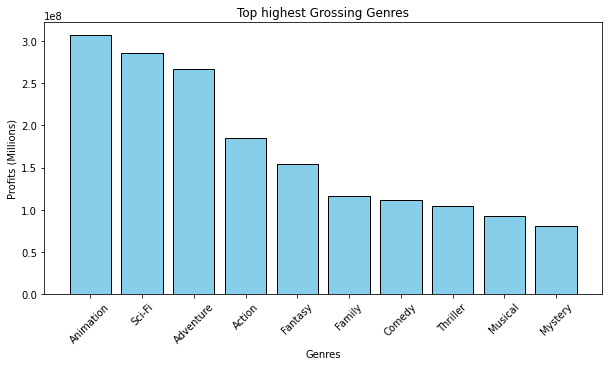

In [51]:
plt.figure(figsize=(10,5))
plt.bar(Top_Genres.index,Top_Genres,color="skyblue",edgecolor="black")
plt.title("Top highest Grossing Genres")
plt.xlabel("Genres")
plt.ylabel("Profits (Millions)")
plt.xticks(rotation=45)
plt.show();

### Analysis on the release seasons

here we are looking at the performance of movies based on the season they were released.

In [52]:
average_gross_season = all_data.groupby('release_season')['Profit'].mean()
average_gross_season

release_season
Autumn    9.162582e+07
Spring    1.367936e+08
Summer    1.469774e+08
Winter    1.057691e+08
Name: Profit, dtype: float64

Movies released during different seasons have varying average profitability.
Summer and Spring are the seasons with the highest average profitability.

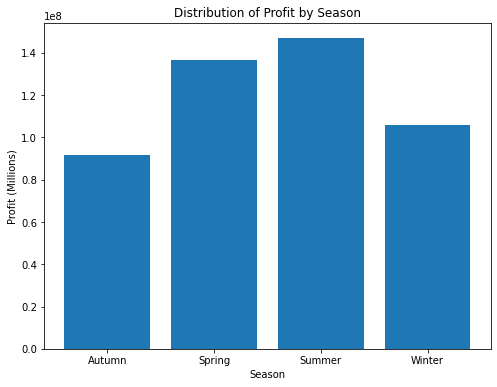

In [53]:
# visualize the results
plt.figure(figsize=(8, 6))
plt.bar(average_gross_season.index, average_gross_season)
plt.title('Distribution of Profit by Season')
plt.xlabel('Season')
plt.ylabel('Profit (Millions)')
plt.show();


### Top Average Rating by Genre
here we are looking at the genres that received the highest ratings for movies

In [54]:
highest_AVG_R=Grouped_genres["averagerating"].mean().nlargest(10)
highest_AVG_R

genres
History      7.096875
Biography    7.066667
Sport        7.004762
Musical      6.750000
Drama        6.692491
Western      6.687500
Sci-Fi       6.661765
Animation    6.617582
Crime        6.543678
Adventure    6.532660
Name: averagerating, dtype: float64

Genres such as History and Biography  have the highest average ratings. While they may not be among the top profit-generating genres, they have a dedicated audience.

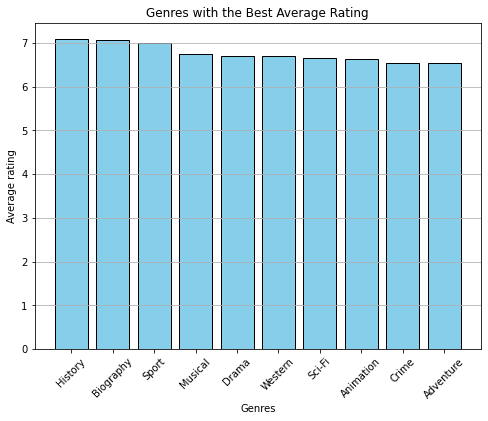

In [55]:
plt.figure(figsize=(8,6))
plt.bar(highest_AVG_R.index,highest_AVG_R.values,color='skyblue',edgecolor="black")
plt.title("Genres with the Best Average Rating")
plt.xlabel("Genres")
plt.ylabel("Average rating")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show();

### Top Genres with the high votes


In [56]:
highest_Votes=Grouped_genres["numvotes"].mean().nlargest(10)
highest_Votes

genres
Sci-Fi       315900.343137
Western      243064.750000
Adventure    220443.010101
Action       204827.033426
Fantasy      170402.910000
Mystery      153280.098901
Thriller     150762.192708
History      137426.718750
Crime        137204.356322
Animation    136744.043956
Name: numvotes, dtype: float64

Sci-Fi, Western, and Adventure have the highest number of votes on average. This suggests that these genres tend to engage and captivate the audience, making them a solid choice for creating films with a broad reach

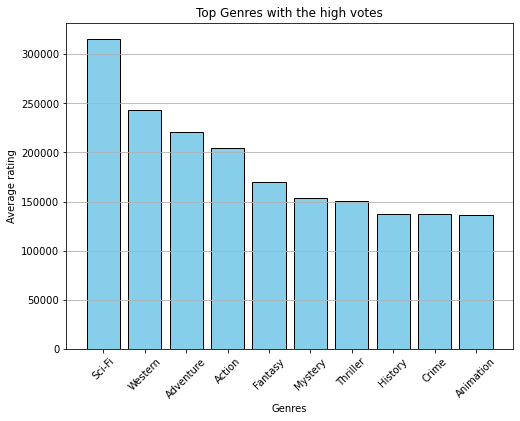

In [57]:
plt.figure(figsize=(8,6))
plt.bar(highest_Votes.index,highest_Votes.values,color='skyblue',edgecolor="black")
plt.title("Top Genres with the high votes")
plt.xlabel("Genres")
plt.ylabel("Average rating")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show();

In [58]:
# median production_budget for movie genres

In [59]:
Grouped_genres=uncomb_genr.groupby("genres")

In [60]:
Grouped_genres["production_budget"].describe()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,359.0,8.704875e+07,7.076729e+07,3000000.0,32000000.0,63000000.0,132500000.0,410600000.0
Adventure,297.0,1.121764e+08,7.243684e+07,1800000.0,50000000.0,110000000.0,165000000.0,410600000.0
Animation,91.0,1.029945e+08,5.477502e+07,8000000.0,60000000.0,90000000.0,145000000.0,260000000.0
Biography,111.0,2.788532e+07,2.231084e+07,270000.0,11500000.0,22000000.0,37000000.0,135000000.0
Comedy,430.0,4.525686e+07,4.422433e+07,50000.0,15000000.0,30000000.0,60000000.0,260000000.0
Crime,174.0,3.593460e+07,3.083478e+07,270000.0,16000000.0,30000000.0,42875000.0,250000000.0
Documentary,13.0,1.924615e+07,3.967274e+07,1000000.0,2900000.0,10000000.0,12800000.0,150000000.0
Drama,546.0,3.029634e+07,3.340676e+07,50000.0,10000000.0,20000000.0,37500000.0,210000000.0
Family,70.0,7.208429e+07,6.199250e+07,3000000.0,20000000.0,46500000.0,111500000.0,250000000.0


In [61]:
Budget_Genres=Grouped_genres["production_budget"].median().nlargest(10)
Budget_Genres

genres
Adventure    110000000.0
Sci-Fi       100000000.0
Animation     90000000.0
Fantasy       66250000.0
Action        63000000.0
Musical       62500000.0
Family        46500000.0
Western       37500000.0
Comedy        30000000.0
Crime         30000000.0
Name: production_budget, dtype: float64

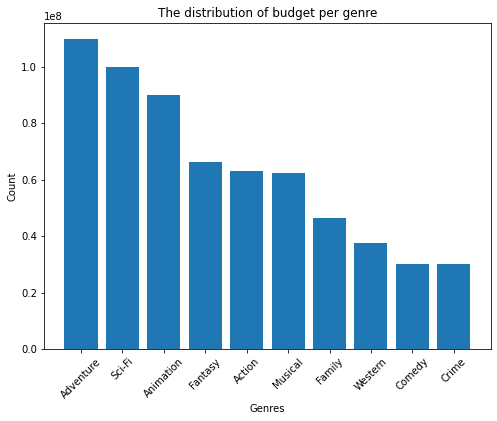

In [62]:
plt.figure(figsize=(8,6))
plt.bar(Budget_Genres.index,Budget_Genres.values)
plt.title("The distribution of budget per genre")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show();

### Trend of Average Profits
we found the Average profit made in every year in order to analyze the growth of film industry

In [63]:
top_genre_per_year = uncomb_genr.groupby(["start_year","genres"])["Profit"].mean()
top_genre_per_year

start_year  genres   
2010        Action       9.554831e+07
            Adventure    2.151294e+08
            Animation    3.684145e+08
            Biography    8.656901e+07
            Comedy       7.833693e+07
                             ...     
2018        Mystery      4.121472e+07
            Romance      9.870949e+07
            Sci-Fi       4.787217e+08
            Sport        9.605934e+07
            Thriller     8.708470e+07
Name: Profit, Length: 172, dtype: float64

In [64]:
all_data.groupby("start_year").describe()

runtime_minutes                                                     \
                     count        mean        std   min    25%    50%     75%   
start_year                                                                      
2010                 150.0  106.120000  15.491466  41.0   97.0  105.0  113.00   
2011                 151.0  106.304636  15.822344  63.0   94.0  105.0  114.00   
2012                 126.0  108.857143  20.683796  82.0   93.0  104.5  117.50   
2013                 127.0  111.000000  20.295828  25.0   98.0  109.0  119.00   
2014                 123.0  111.317073  18.547377  81.0   98.5  106.0  122.00   
2015                 125.0  112.328000  17.490908  81.0   99.0  110.0  123.00   
2016                 138.0  110.782609  16.769254  81.0   98.0  109.0  120.00   
2017                 100.0  111.640000  17.991311  72.0   97.0  111.5  121.25   
2018                  95.0  112.642105  16.285953  84.0  100.0  111.0  123.00   

                  averagerating            ...        Profit                \
              max         count      mean  ...           75%           max   
start_year                                 ...                               
2010        165.0         150.0  6.377333  ...  1.147899e+08  8.688795e+08   
2011        154.0         151.0  6.348344  ...  1.122567e+08  9.287905e+08   
2012        176.0         126.0  6.511111  ...  1.365016e+08  9.105270e+08   
2013        180.0         127.0  6.550394  ...  1.544090e+08  1.122470e+09   
2014        169.0         123.0  6.528455  ...  1.535791e+08  8.940391e+08   
2015        168.0         125.0  6.446400  ...  1.087783e+08  1.433855e+09   
2016        170.0         138.0  6.463043  ...  1.443412e+08  8.900694e+08   
2017        167.0         100.0  6.508000  ...  2.140710e+08  9.848463e+08   
2018        152.0          95.0  6.409474  ...  1.469079e+08  1.748134e+09   

           release_month                                                  
                   count      mean       std  min   25%  50%   75%   max  
start_year                                                                
2010               150.0  7.446667  3.434012  1.0  5.00  8.0  10.0  12.0  
2011               151.0  7.052980  3.300077  1.0  4.00  7.0  10.0  12.0  
2012               126.0  7.214286  3.314470  1.0  4.25  8.0  10.0  12.0  
2013               127.0  7.165354  3.488675  1.0  4.50  7.0  10.0  12.0  
2014               123.0  7.186992  3.405275  1.0  4.00  8.0  10.0  12.0  
2015               125.0  7.472000  3.239315  1.0  5.00  8.0  10.0  12.0  
2016               138.0  7.072464  3.484350  1.0  4.00  7.0  10.0  12.0  
2017               100.0  7.370000  3.236955  1.0  5.00  7.0  10.0  12.0  
2018                95.0  7.126316  3.543775  1.0  4.00  7.0  10.5  12.0  

[9 rows x 64 columns]

In [65]:
Max_profit_yrs = all_data.groupby("start_year")["Profit"].mean()
Max_profit_yrs

start_year
2010    8.149128e+07
2011    8.525549e+07
2012    1.131444e+08
2013    1.216148e+08
2014    1.298379e+08
2015    1.202529e+08
2016    1.223498e+08
2017    1.640776e+08
2018    1.626008e+08
Name: Profit, dtype: float64

We can visualize the results 

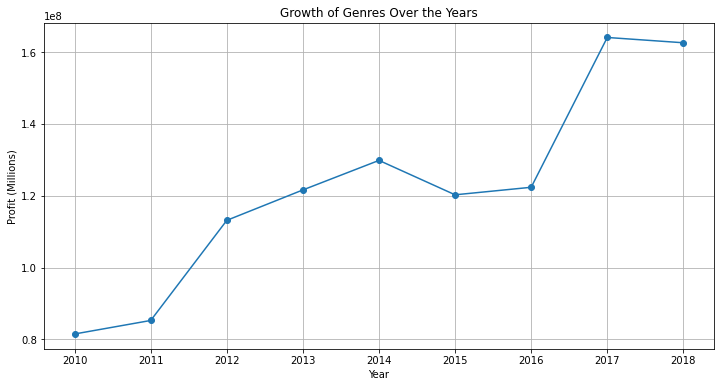

In [66]:
# Create a line chart to visualize the top genres over the years
plt.figure(figsize=(12, 6))
plt.plot(Max_profit_yrs.index, Max_profit_yrs, marker='o', linestyle='-')
plt.title('Growth of Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Profit (Millions)')
plt.xticks(Max_profit_yrs.index)
plt.grid(True)
plt.show()

It is observed that there is increase in the profitability as the years increases.This shows that the industry is growing rapidly from 2010 to reaching peak  in 2018.

### Most profitable Successful  Combined Genres
finding which genres were the most successful at the box office 

In [67]:
# we group by genre
grouped_genre=all_data.groupby("genres")

In [68]:
# we can do more statistical analysis i.e median ,sum

grouped_genre["Profit"].agg(['median','sum'])


,median,sum
genres,,
Action,7018988.0,7.018988e+06
"Action,Adventure",-4488226.0,-4.488226e+06
"Action,Adventure,Animation",387664265.0,5.003225e+09
"Action,Adventure,Biography",22897191.0,4.105288e+08
"Action,Adventure,Comedy",304803696.0,6.107212e+09
...,...,...
Music,-8917094.0,-8.917094e+06
"Mystery,Sci-Fi,Thriller",168268832.0,3.365377e+08
"Mystery,Thriller",219461782.0,2.194618e+08


In [69]:
print("Genre Analysis - Top-Performing Genres:")

top_gross_genre=grouped_genre['Profit'].mean().nlargest(10)
top_gross_genre


Genre Analysis - Top-Performing Genres:


genres
Adventure,Drama,Sci-Fi        5.243254e+08
Comedy,Mystery                5.064643e+08
Action,Adventure,Sci-Fi       4.923576e+08
Adventure,Fantasy             4.695440e+08
Action,Adventure,Comedy       3.592478e+08
Action,Adventure,Animation    3.573732e+08
Animation,Comedy,Family       3.518153e+08
Adventure,Animation,Comedy    3.268089e+08
Adventure,Drama,Fantasy       3.045515e+08
Drama,Romance,Thriller        3.044666e+08
Name: Profit, dtype: float64

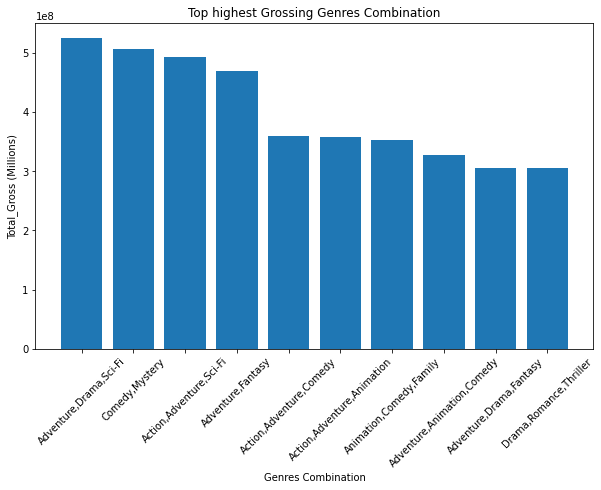

In [70]:
# A bar chart

plt.figure(figsize=(10, 6))
plt.bar(top_gross_genre.index ,top_gross_genre.values)
plt.title("Top highest Grossing Genres Combination")
plt.xlabel("Genres Combination")
plt.ylabel("Total_Gross (Millions)")
plt.xticks(rotation=45)
plt.show();

### Studio Analysis at the box office
We can find the best performing studio in relation to the box office by looking at which studios had the highest grossing movies 

In [71]:
grouped_studios=all_data.groupby("studio")

In [72]:
print("\nStudio Analysis - Top-Performing Studios:")

best_studios=grouped_studios["Profit"].mean().nlargest(10)
best_studios


Studio Analysis - Top-Performing Studios:


studio
P/DW        3.744028e+08
BV          3.380235e+08
GrtIndia    2.335029e+08
Uni.        1.729512e+08
Fox         1.683635e+08
WB (NL)     1.669137e+08
Sony        1.661143e+08
WB          1.454930e+08
Par.        1.353790e+08
MGM         9.677964e+07
Name: Profit, dtype: float64

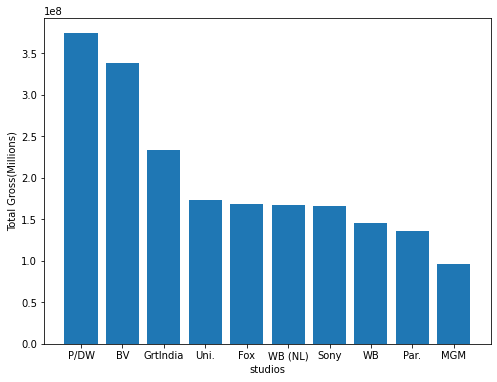

In [73]:
plt.figure(figsize=(8,6))
plt.bar(best_studios.index,best_studios.values)
plt.xlabel("studios")
plt.ylabel("Total Gross(Millions)")
plt.show()

###  Relationship between number of votes, average rating and their profits at the box office

In [74]:
# Calculate the correlation coefficients
corr_1 = all_data['numvotes'].corr(all_data['Profit'])
corr_2 = all_data['averagerating'].corr(all_data['Profit'])


In [75]:
print("Correlation between Average Rating and Profit :", corr_2)

Correlation between Average Rating and Profit : 0.29172244649867185


There is a negative correlation between the average rating and their profits.We can confirm this using a scatter plot

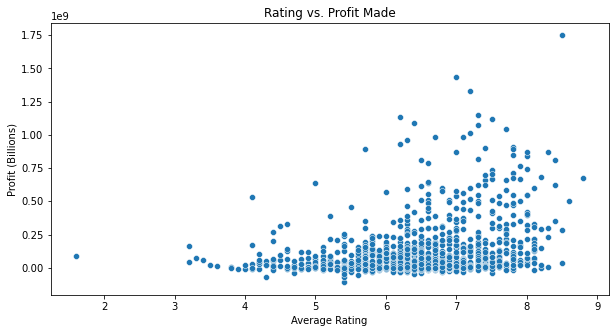

In [76]:

plt.figure(figsize=(10, 5))
sns.scatterplot(data=all_data, x='averagerating', y='Profit')
plt.xlabel("Average Rating")
plt.ylabel("Profit (Billions)")
plt.title("Rating vs. Profit Made")
plt.show()

In [77]:
corr_1 = all_data['numvotes'].corr(all_data['Profit'])

Correlation between Number of Votes and Profit : 0.6073249038809306


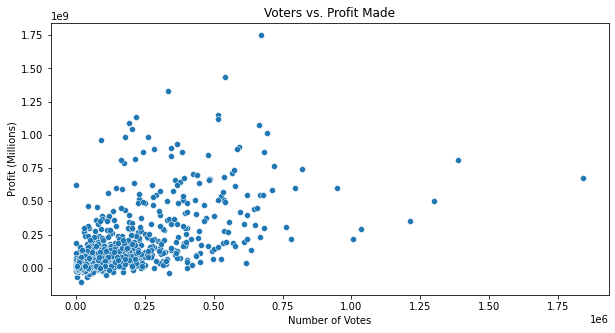

In [78]:
print("Correlation between Number of Votes and Profit :", corr_1)

# plot the scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=all_data, x='numvotes', y='Profit')
plt.xlabel("Number of Votes")
plt.ylabel("Profit (Millions)")
plt.title("Voters vs. Profit Made")
plt.show()

### Movie Genre with the most votes

here am looking at movie genre type to find out which genres had the most audience engagments based on votes.Through this we can find which genres are most popular among audience and eventually recommend insights

In [79]:
print("Votes Analysis - Top-Performing Genres:")

grouped_gen=all_data.groupby(by="genres")
top_votes=grouped_gen["numvotes"].mean().nlargest(10)
top_votes

Votes Analysis - Top-Performing Genres:


genres
Mystery,Thriller            1.005960e+06
Adventure,Drama,Sci-Fi      9.897250e+05
Drama,Western               6.195645e+05
Adventure,Mystery,Sci-Fi    5.387200e+05
Action,Adventure,Sci-Fi     4.333590e+05
Comedy,Mystery              4.328000e+05
Mystery,Sci-Fi,Thriller     4.065325e+05
Action,Adventure,Mystery    3.997030e+05
Drama,Sci-Fi,Thriller       3.971750e+05
Adventure,Fantasy           3.757703e+05
Name: numvotes, dtype: float64

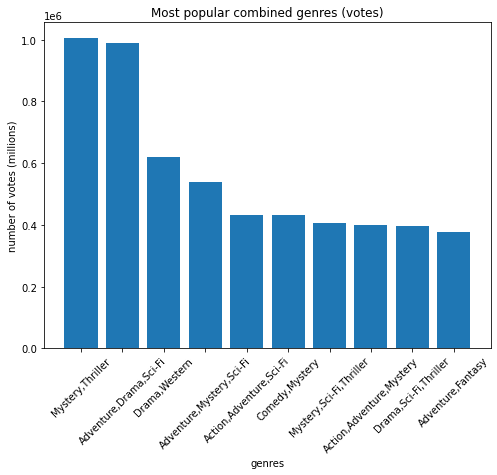

In [80]:
plt.figure(figsize=(8,6))
plt.bar(top_votes.index,top_votes.values)
plt.title("Most popular combined genres (votes)")
plt.ylabel("number of votes (millions)")
plt.xlabel("genres")
plt.xticks(rotation=45)
plt.show();

### Budget Analysis
is there a relationship between production budget and the profit made


In [81]:
corre= all_data["Profit"].corr(all_data["production_budget"])
corre

0.650578635323845

There is a positive relationship between the budget of a movie and their performance at the box office

the correlation between budget and Profits :0.650578635323845


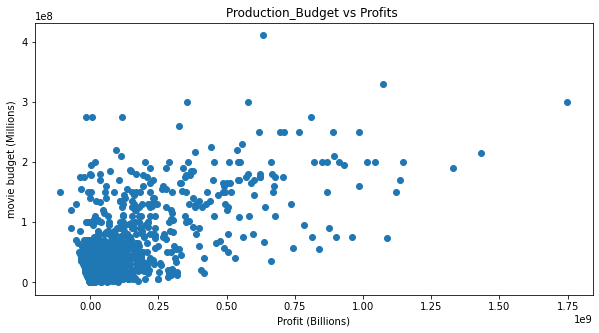

In [82]:
print(f"the correlation between budget and Profits :{corre}")
# ploting a scatter plot

plt.figure(figsize=(10,5))
plt.scatter(all_data["Profit"],all_data["production_budget"])
plt.title("Production_Budget vs Profits ")
plt.xlabel("Profit (Billions)")
plt.ylabel("movie budget (Millions)")
plt.show();

As the production budget increases the profit increases as well.This idicates that movies with properly allocated funds produce a lot of profit in return.

## Conclusion

This analysis leads to these recommendations to help microsoft decide the type of films to create:

Genre selection:Focus on "sci-fi" and "animation" genres for film production.These two genres have had highest worlwide Gross revenue at the box office."sci-fi" genre as shown strong popularity among audience as it received the highest votes.This indicates strong audience preference.

Strategic Timing: Microsoft should strategically time their film releases, aiming for the summer and holiday seasons. This can optimize box office earnings and overall performance.

Combined_Genre Selection: Focus on 'Adventure, Drama, Sci-Fi' genres combination for film production, as this genres have shown strong poplarity ,high rating and high box office performance, indicating significant audience interest.it has been the most successful genre combination at box office currently.

High-Engagement Genres: Invest in a strong social media presence to reach a diverse international audience. Prioritize creating films genres that are apealing  and quality such as "sci-fi" genre.This engages the audience, as movies with a high number of votes tend to perform well at the box office. This approach can lead to increased audience engagement and higher box office returns.

Budget Allocation for Maximum Profit: consider allocating a larger budgets to produce high Quality films in the genres such as Adventure or Sci-fi genres.Genres that had a well production budget for a movie had higher worldwide Gross and profits. 

Collaboration with Studios: Explore collaboration opportunities with successful studios like P/DW and BV studios , as they have demonstrated high total gross revenues. Such partnerships have the potential to enhance profitability.Building strategic partnerships with successful studios can provide opportunities for co-productions and co-distribution can as well increase your audience.


## Next steps

Further analyses could yield additional insights to help microsoft's studio create films:

Better understanding of content themes.This modeling could analyze the most common themes in the specified genres that are apealing to audience.This can be useful in crafting relevant and captivating storylines.

Better Understanding of audience.This modeling can help understand the age distribution,gender distribution and locations of our audience in order to develope marketing strategies to help make higher revenues.
